# Part I - Loans Data Exploration
## by Mansi Vermani

## Introduction
 The Prosper loan dataset is a comprehensive collection of 113,937 loans, each with 81 variables providing detailed information about the loans. This dataset offers valuable insights into the lending practices and borrower characteristics. It encompasses a wide range of loan attributes, including loan amount, borrower rate (interest rate), current loan status, borrower income, and many other relevant factors.

## Preliminary Wrangling


In [1]:
# importing all required packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 14, 12

Loading loans dataset and describing its properties.

In [2]:
loans = pd.read_csv('prosperLoanData.csv')
pd.set_option('display.max_columns', None)
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [3]:
# high-level overview of data shape 
print(loans.shape)


(113937, 81)


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

The dataset has 113937 records with 81 columns. As the number of columns are higher, we need to select only those column that will be required for answering specific questions.

### What is the structure of the dataset?

 The dataset has 113937 records with 81 columns.The datatypes are str, int, float and boolean.

### What is/are the main feature(s) of interest in our dataset?
 I am mostly interested in figuring out what factors impact the APR and which loans are at the risk of default

### What features in the dataset will help support our investigation into our feature(s) of interest?

>LoanKey <br>
LoanStatus <br>
BorrowerAPR <br>
CreditGrade<br>
ProsperRating (alpha) <br>
ListingCategory(Numeric) <br>
Occupation <br>
EmploymentStatus <br>
DebtToIncomeRatio <br>
StatedMonthlyIncome <br>
IncomeVerifiable <br>
LoanOriginationDate <br>
LoanOriginalAmount <br>
Term <br>
OpenRevolvingMonthlyPayment <br>
TradesNeverDelinquent (percentage) 

In [5]:
# Lets filter the above columns in a new dataframe.
cols = ['LoanKey', 'LoanStatus', 'BorrowerAPR', 'CreditGrade', 'ProsperRating (Alpha)', 'ListingCategory (numeric)',
        'Occupation', 'EmploymentStatus', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'IncomeVerifiable', 
        'LoanOriginationDate', 'LoanOriginalAmount', 'Term', 'OpenRevolvingMonthlyPayment', 
       'TradesNeverDelinquent (percentage)']

loans_subset = loans[cols]


In [6]:
loans_subset.sample(10)

,LoanKey,LoanStatus,BorrowerAPR,CreditGrade,ProsperRating (Alpha),ListingCategory (numeric),Occupation,EmploymentStatus,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,LoanOriginationDate,LoanOriginalAmount,Term,OpenRevolvingMonthlyPayment,TradesNeverDelinquent (percentage)
111601,6080368595300045210895F,Current,0.18214,NaN,B,1,Sales - Commission,Employed,0.32,4750.000000,True,2013-06-19 00:00:00,13000,36,493.0,1.00
14421,1E6433747129868282680C1,Completed,0.08718,A,NaN,0,Student - College Sophomore,Not available,0.19,1675.000000,True,2006-11-20 00:00:00,1000,36,0.0,NaN
72975,422A3372191132984F697D3,Defaulted,0.29776,E,NaN,0,NaN,NaN,0.16,4605.833333,True,2006-11-10 00:00:00,3500,36,70.0,NaN
1300,BBD63704875536836B7BD08,Current,0.21687,NaN,C,15,Realtor,Self-employed,NaN,4500.000000,False,2014-02-11 00:00:00,15000,36,202.0,0.88
74524,207333750909023235B5A21,Completed,0.16747,D,NaN,0,NaN,NaN,0.14,3293.333333,True,2006-12-14 00:00:00,1025,36,0.0,NaN
73027,46E23675660252671746597,Current,0.17061,NaN,B,13,Other,Employed,0.44,4333.333333,True,2013-02-19 00:00:00,4000,60,596.0,1.00
105794,6D8E3406572969184C1A2F0,Completed,0.15214,A,NaN,0,Executive,Full-time,0.22,18750.000000,True,2007-11-28 00:00:00,8300,36,1785.0,1.00
100636,388436433690860846EE111,Current,0.24246,NaN,C,13,Teacher,Employed,0.22,6671.666667,True,2012-02-14 00:00:00,4500,36,596.0,0.94
3691,F8313707764081348ED21C3,Current,0.24807,NaN,D,1,Professional,Employed,0.45,5916.666667,True,2014-02-26 00:00:00,10000,36,961.0,1.00
93067,E2ED337928162869732CA38,Completed,0.16717,D,NaN,0,Executive,Not available,0.22,5000.000000,True,2007-01-09 00:00:00,3500,36,716.0,NaN


In [7]:
loans_subset.describe()

,BorrowerAPR,ListingCategory (numeric),DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,Term,OpenRevolvingMonthlyPayment,TradesNeverDelinquent (percentage)
count,113912.000000,113937.000000,105383.000000,1.139370e+05,113937.00000,113937.000000,113937.000000,106393.000000
mean,0.218828,2.774209,0.275947,5.608026e+03,8337.01385,40.830248,398.292161,0.885897
std,0.080364,3.996797,0.551759,7.478497e+03,6245.80058,10.436212,447.159711,0.148179
min,0.006530,0.000000,0.000000,0.000000e+00,1000.00000,12.000000,0.000000,0.000000
25%,0.156290,1.000000,0.140000,3.200333e+03,4000.00000,36.000000,114.000000,0.820000
50%,0.209760,1.000000,0.220000,4.666667e+03,6500.00000,36.000000,271.000000,0.940000
75%,0.283810,3.000000,0.320000,6.825000e+03,12000.00000,36.000000,525.000000,1.000000
max,0.512290,20.000000,10.010000,1.750003e+06,35000.00000,60.000000,14985.000000,1.000000


In [8]:
loans_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   LoanKey                             113937 non-null  object 
 1   LoanStatus                          113937 non-null  object 
 2   BorrowerAPR                         113912 non-null  float64
 3   CreditGrade                         28953 non-null   object 
 4   ProsperRating (Alpha)               84853 non-null   object 
 5   ListingCategory (numeric)           113937 non-null  int64  
 6   Occupation                          110349 non-null  object 
 7   EmploymentStatus                    111682 non-null  object 
 8   DebtToIncomeRatio                   105383 non-null  float64
 9   StatedMonthlyIncome                 113937 non-null  float64
 10  IncomeVerifiable                    113937 non-null  bool   
 11  LoanOriginationDate       

From the above, we observe that APR has 25 missing records.Lets print those missing records

In [9]:
loans_subset['BorrowerAPR'].isna().sum()


25

We observe that there are alot of variables that have missing values for these records.Hence, we can drop these records for improving our analysis

In [10]:
loans_subset = loans_subset[loans_subset['BorrowerAPR'].notna()]
loans_subset.BorrowerAPR.isna().sum()

0

In [11]:
loans_subset.head()

,LoanKey,LoanStatus,BorrowerAPR,CreditGrade,ProsperRating (Alpha),ListingCategory (numeric),Occupation,EmploymentStatus,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,LoanOriginationDate,LoanOriginalAmount,Term,OpenRevolvingMonthlyPayment,TradesNeverDelinquent (percentage)
0,E33A3400205839220442E84,Completed,0.16516,C,NaN,0,Other,Self-employed,0.17,3083.333333,True,2007-09-12 00:00:00,9425,36,24.0,0.81
1,9E3B37071505919926B1D82,Current,0.12016,NaN,A,2,Professional,Employed,0.18,6125.000000,True,2014-03-03 00:00:00,10000,36,389.0,1.00
2,6954337960046817851BCB2,Completed,0.28269,HR,NaN,0,Other,Not available,0.06,2083.333333,True,2007-01-17 00:00:00,3001,36,0.0,NaN
3,A0393664465886295619C51,Current,0.12528,NaN,A,16,Skilled Labor,Employed,0.15,2875.000000,True,2012-11-01 00:00:00,10000,36,115.0,0.76
4,A180369302188889200689E,Current,0.24614,NaN,D,2,Executive,Employed,0.26,9583.333333,True,2013-09-20 00:00:00,15000,36,220.0,0.95


## Univariate Exploration

> In this section, we will investigate distributions of individual variables. If there are unusual points or outliers, we would take a deeper look to clean things up and examine any relationships between variables.

Univariate Exploration can be done using any of the following vasualizations:

1. Bar Charts - for categorical Variables
2. Histograms - for quantitative variables
3. Pie Charts - This is used to depict relative frequencies for levels of a categorical variable


#### Question
What is the distribution of APR?
#### Visualization

In [12]:
def plot_histogram_with_stats(data: pd.DataFrame, column_name: str, bin_max: float, bin_width: float) -> None:
    """
    Plot a histogram of a column from a DataFrame with mean, minimum, and maximum values displayed.

    Args:
        data (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to plot.

    Returns:
        None
    """

    # Create a new figure
    fig = plt.figure(figsize=(11, 5))

    # The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
    # All quantities are in fractions of figure width and height.
    ax = fig.add_axes([.125, .125, .775, .755])
    bins = np.arange(0, bin_max, bin_width)
    ax.hist(data=data, x=column_name, bins=bins)
    
    col_mean = data[column_name].mean()

    plt.axvline(col_mean, color='red', linestyle='dashed', linewidth=2)
    plt.title(column_name)
    plt.xlabel(column_name)
    plt.ylabel('Total Count')
    plt.show()

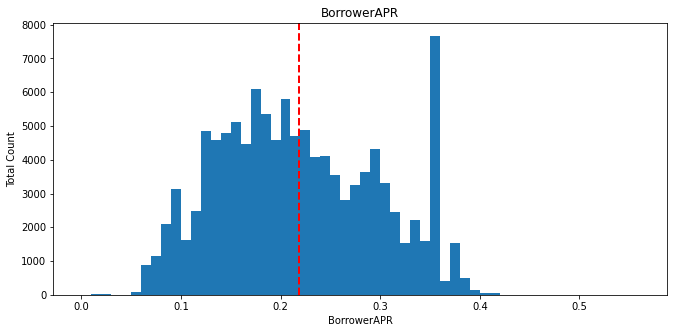

In [13]:
plot_histogram_with_stats(loans_subset, 'BorrowerAPR', loans_subset['BorrowerAPR'].max()+0.05, 0.01)

#### Observations

1. The values of APR range from 0.006 to 0.42 
2. It can be observed that it is multimodal histogram with small peak at 0.1 and bigger ones at 0.2. Afterward, it goes on a downward trend with a peak at 0.3 and a sudden spike at 0.36
3. We observe that majority of the data is centered around the mean Value i.e. 0.22 

#### Question
What is the distribution of StatedMonthlyIncome?

#### Visualization

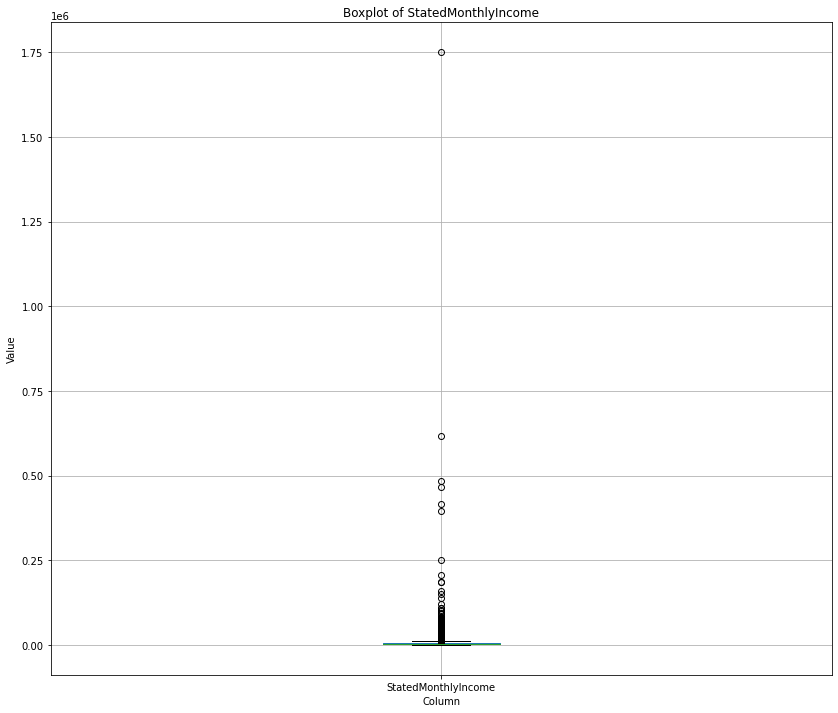

In [14]:
# Lets first plot a boxplot to find any outliers in the Monthly Income column

loans_subset.boxplot(column='StatedMonthlyIncome')

# Set the title and axis labels
plt.title('Boxplot of {}'.format('StatedMonthlyIncome'))
plt.xlabel('Column')
plt.ylabel('Value')

# Show the plot
plt.show()

We see from the above figure that majority values are within 0.75, hence to plot a histogram, we can take the maximum bin width to be 0.75 i.e 75000 as the values are automatically converted into decimals while plotting box plot

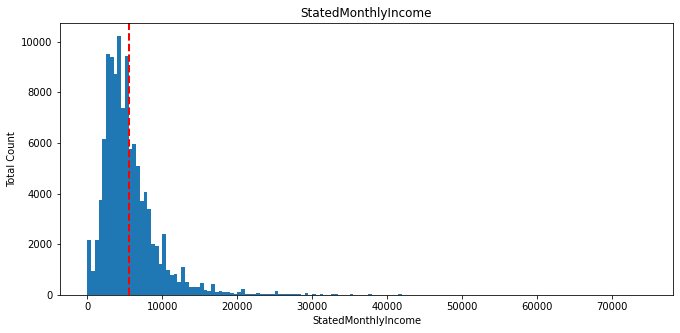

In [15]:
plot_histogram_with_stats(loans_subset, 'StatedMonthlyIncome', 75000, 500)

#### Observation

1. The distribution is right skewed, indicating the majority loans were applied by people having monthly income of less than USD 40,000
2. The mean income of the applicants is around USD 5,000 suggesting majority of the applicants are earning monthly income ranging between 0 - USD 8,000.
3. There are a lot of data points at 0, which suggests that these people are not earning any income or these are missing records

#### Question:
What is the distribution of LoanOriginalAmount?

#### Visualization:

In [16]:
# Lets find the maximum amount of loan 
loans_subset.LoanOriginalAmount.max()

35000

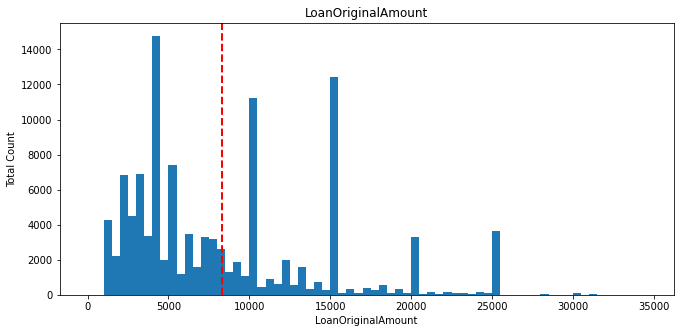

In [17]:
plot_histogram_with_stats(loans_subset, 'LoanOriginalAmount', 35000, 500)

1. The distribution of loan amount is multimodal.It shows multiple spikes around USD 4,000, USD 5,000 and then at USD 10,000, USD 15000, and samll peaks at USD 20000, USD 25,000. This is since loans are granted in denominations of 5000.
2. Majority applications applied for a loan amount of less than USD 10,000


#### Question
What is the distibution for DebtToIncomeRatio?

In [18]:
loans_subset.DebtToIncomeRatio.describe()

count    105358.000000
mean          0.275993
std           0.551814
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

There are some missing values in DebtToIncomeRatio. We will remove those values.

In [19]:
loans_subset = loans_subset[loans_subset['DebtToIncomeRatio'].notna()]

In [20]:
loans_subset.head()

,LoanKey,LoanStatus,BorrowerAPR,CreditGrade,ProsperRating (Alpha),ListingCategory (numeric),Occupation,EmploymentStatus,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,LoanOriginationDate,LoanOriginalAmount,Term,OpenRevolvingMonthlyPayment,TradesNeverDelinquent (percentage)
0,E33A3400205839220442E84,Completed,0.16516,C,NaN,0,Other,Self-employed,0.17,3083.333333,True,2007-09-12 00:00:00,9425,36,24.0,0.81
1,9E3B37071505919926B1D82,Current,0.12016,NaN,A,2,Professional,Employed,0.18,6125.000000,True,2014-03-03 00:00:00,10000,36,389.0,1.00
2,6954337960046817851BCB2,Completed,0.28269,HR,NaN,0,Other,Not available,0.06,2083.333333,True,2007-01-17 00:00:00,3001,36,0.0,NaN
3,A0393664465886295619C51,Current,0.12528,NaN,A,16,Skilled Labor,Employed,0.15,2875.000000,True,2012-11-01 00:00:00,10000,36,115.0,0.76
4,A180369302188889200689E,Current,0.24614,NaN,D,2,Executive,Employed,0.26,9583.333333,True,2013-09-20 00:00:00,15000,36,220.0,0.95


A debt to income ratio of 1 suggests that the amount of loan taken by a borrower and the income earned by the borrower for the period in consideration are same. Only if the debt to income ratio is high, there will a higher risk as borrower has borrowed than his repaying capacity.Hence, we will examine the data in separate graphs for debt to income ratio less than 1 and where all ratios are present

#### Visualization

Text(0, 0.5, 'Count')

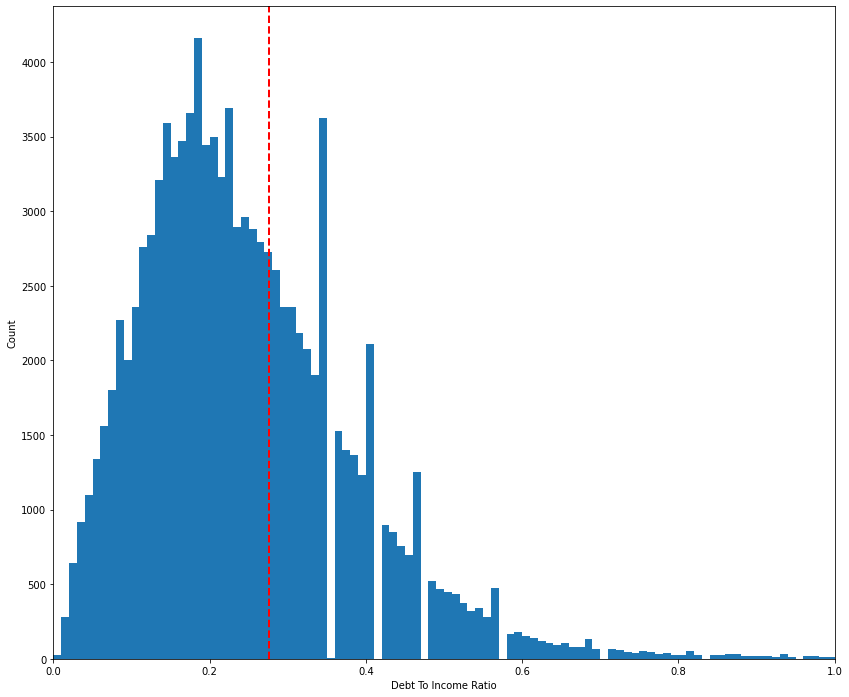

In [21]:
DTIR_max = loans_subset.DebtToIncomeRatio.max()
bin_width = 0.01
bins = np.arange(0, DTIR_max+bin_width, bin_width)
plt.hist(data=loans_subset, x='DebtToIncomeRatio', bins=bins);
plt.axvline(loans_subset['DebtToIncomeRatio'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlim((0,1));
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

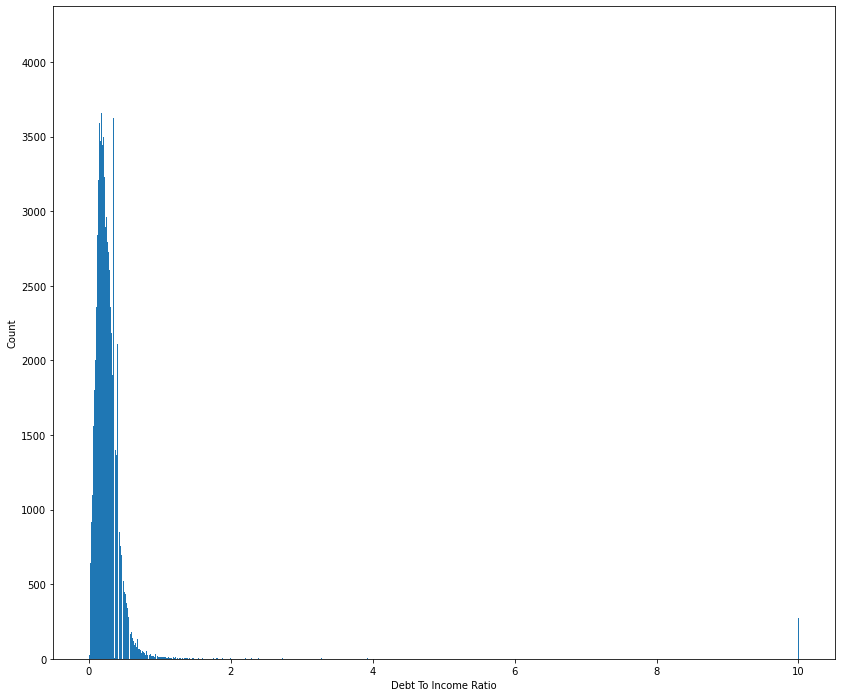

In [22]:
DTIR_max = loans_subset.DebtToIncomeRatio.max()
bin_width = 0.01
bins = np.arange(0, DTIR_max+bin_width, bin_width)
plt.hist(data=loans_subset, x='DebtToIncomeRatio', bins=bins);
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Count')

#### Observations
1. We observe from the above graphs that the distribution of Debt to Income ratio is right skewed.
2. The mean is around 0.3 suggesting that majority borrowers who applied for loan value have a debt to income percentage of 30%

### Loan Status
Next we examine the Loan Status which is a categorical variable, Hence we will use a bar chart, to check the frequency of each category

#### Question

What proportion of borrowers repaid the loans.What is general repayment behaviour?


#### Visualization:

Let's first check the value_counts of each category of loan status

In [23]:
loans_subset.LoanStatus.value_counts()

Current                   52478
Completed                 35315
Chargedoff                10751
Defaulted                  4763
Past Due (1-15 days)        722
Past Due (31-60 days)       327
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       242
FinalPaymentInProgress      189
Past Due (>120 days)         14
Cancelled                     5
Name: LoanStatus, dtype: int64

In [24]:
# Let's update all cells containing 'past due' values as Past Due, removing the number of days past due date.

loans_subset.loc[loans_subset.LoanStatus.str.contains('Past Due '), 'LoanStatus'] = 'Past Due'


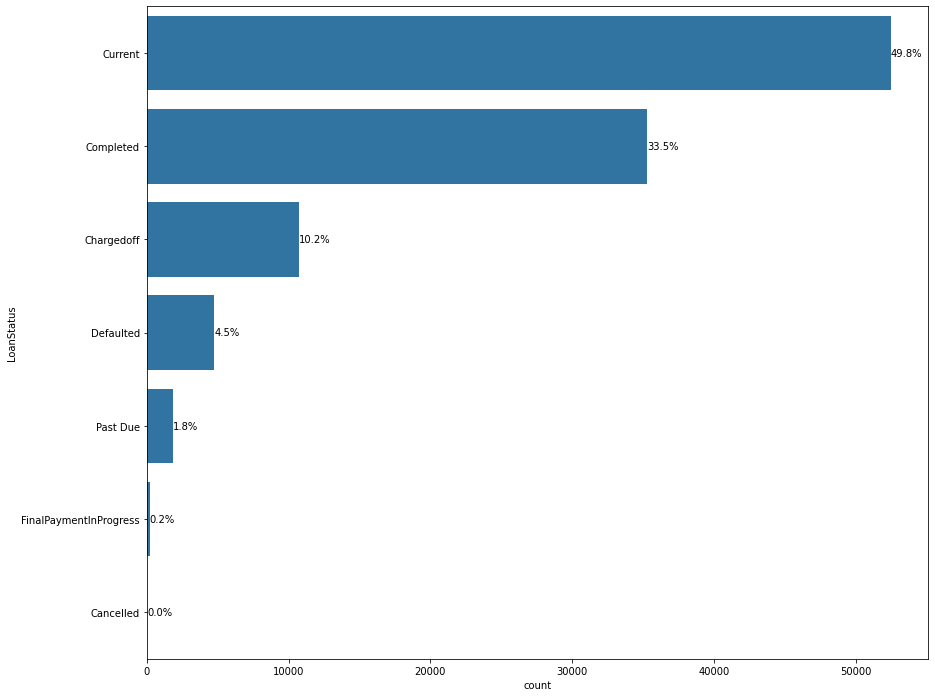

In [25]:
n_loans = loans_subset.shape[0]
status_count = loans_subset.LoanStatus.value_counts()
status_order = status_count.index
base_color = sb.color_palette()[0]
sb.countplot(data=loans_subset, y='LoanStatus', color=base_color, order=status_order);

## Logic to print the proportion text on the bars
for i in range (status_count.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = status_count[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/n_loans)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

#### Observations:


1. Default Rate : 4.5%. The specific threshold for a "good" default rate can vary depending on the industry and risk tolerance. A default rate below 5% or even 3% is often considered good.This metric is within acceptable rate.
2. Charge-off Rate : 10.2%.The charge-off rate represents the percentage of loans that are deemed uncollectible and written off as losses. A charge-off rate below 2% or 3% is often considered good.However, this is way higher than the accepatble rate.

we can examine the data for borrowers whose loans where charged off to find the reasons for non-payment

In [26]:
loans_subset_c = loans_subset.query('LoanStatus == "Chargedoff"')

### Rating
Next we will examine the "Rating". As we know from the variable definitions :
    1. CreditGrade : The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
    2. ProsperRating (Alpha) - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
We can merge the two columns into one - 'Rating' to maximise our non-null values in the column, since both provide rating of the borrower.

Also, Rating is a categorical - ordinal variable.

#### Question
How's borrower rating  distributed?

In [27]:
loans_subset.loc[:,['CreditGrade', 'ProsperRating (Alpha)']] = loans_subset[['CreditGrade', 'ProsperRating (Alpha)']].fillna('')

In [28]:
loans_subset_c.loc[:,['CreditGrade', 'ProsperRating (Alpha)']] = loans_subset_c[['CreditGrade', 'ProsperRating (Alpha)']].fillna('')

/var/folders/w0/nbsnlqqd60s_jl5jwcqh9d7r0000gn/T/ipykernel_22985/558765928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_subset_c.loc[:,['CreditGrade', 'ProsperRating (Alpha)']] = loans_subset_c[['CreditGrade', 'ProsperRating (Alpha)']].fillna('')


In [29]:
loans_subset.CreditGrade.isna().sum()

0

In [30]:
loans_subset_c.CreditGrade.isna().sum()

0

In [31]:
loans_subset['ProsperRating (Alpha)'].isna().sum()

0

In [32]:
loans_subset_c['ProsperRating (Alpha)'].isna().sum()

0

In [33]:
loans_subset.loc[:, 'Rating'] = loans_subset['CreditGrade'] + loans_subset['ProsperRating (Alpha)']

In [34]:
loans_subset_c.loc[:, 'Rating'] = loans_subset_c['CreditGrade'] + loans_subset_c['ProsperRating (Alpha)']

/var/folders/w0/nbsnlqqd60s_jl5jwcqh9d7r0000gn/T/ipykernel_22985/4257912245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_subset_c.loc[:, 'Rating'] = loans_subset_c['CreditGrade'] + loans_subset_c['ProsperRating (Alpha)']


In [35]:
loans_subset.Rating.value_counts()

C     22365
B     18737
D     17846
A     16829
E     11835
HR     9162
AA     8385
        120
NC       79
Name: Rating, dtype: int64

In [36]:
loans_subset_c.Rating.value_counts()

D     2449
HR    2159
C     1867
E     1848
B     1291
A      775
AA     340
NC      18
         4
Name: Rating, dtype: int64

NC means No Credit, this is for people with no Credit History.

Drop rows where rating is missing or NC and plot the rest 

In [37]:
loans_subset = loans_subset[(loans_subset['Rating'] != "") & (loans_subset['Rating'] != "NC")]
loans_subset.Rating.value_counts()

C     22365
B     18737
D     17846
A     16829
E     11835
HR     9162
AA     8385
Name: Rating, dtype: int64

In [39]:
loans_subset_c =loans_subset_c[(loans_subset_c['Rating'] != "") & (loans_subset_c['Rating'] != "NC")]
loans_subset_c.Rating.value_counts()

D     2449
HR    2159
C     1867
E     1848
B     1291
A      775
AA     340
Name: Rating, dtype: int64

In [41]:
# Drop columns - CreditGrade, ProsperRating (Alpha)
loans_subset = loans_subset.drop(['CreditGrade', 'ProsperRating (Alpha)'], axis=1)
loans_subset.head()

,LoanKey,LoanStatus,BorrowerAPR,ListingCategory (numeric),Occupation,EmploymentStatus,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,LoanOriginationDate,LoanOriginalAmount,Term,OpenRevolvingMonthlyPayment,TradesNeverDelinquent (percentage),Rating
0,E33A3400205839220442E84,Completed,0.16516,0,Other,Self-employed,0.17,3083.333333,True,2007-09-12 00:00:00,9425,36,24.0,0.81,C
1,9E3B37071505919926B1D82,Current,0.12016,2,Professional,Employed,0.18,6125.000000,True,2014-03-03 00:00:00,10000,36,389.0,1.00,A
2,6954337960046817851BCB2,Completed,0.28269,0,Other,Not available,0.06,2083.333333,True,2007-01-17 00:00:00,3001,36,0.0,NaN,HR
3,A0393664465886295619C51,Current,0.12528,16,Skilled Labor,Employed,0.15,2875.000000,True,2012-11-01 00:00:00,10000,36,115.0,0.76,A
4,A180369302188889200689E,Current,0.24614,2,Executive,Employed,0.26,9583.333333,True,2013-09-20 00:00:00,15000,36,220.0,0.95,D


In [40]:
loans_subset_c = loans_subset_c.drop(['CreditGrade', 'ProsperRating (Alpha)'], axis=1)
loans_subset_c.head()

,LoanKey,LoanStatus,BorrowerAPR,ListingCategory (numeric),Occupation,EmploymentStatus,DebtToIncomeRatio,StatedMonthlyIncome,IncomeVerifiable,LoanOriginationDate,LoanOriginalAmount,Term,OpenRevolvingMonthlyPayment,TradesNeverDelinquent (percentage),Rating
17,51453366538336630763636,Chargedoff,0.13202,0,Professional,Not available,0.12,5833.333333,True,2006-08-22 00:00:00,10000,36,346.0,NaN,AA
42,2D433381278297817311230,Chargedoff,0.30300,0,Other,Not available,0.27,416.666667,True,2007-02-09 00:00:00,1500,36,0.0,NaN,HR
57,3F2936403268585514E9BDD,Chargedoff,0.29394,1,Construction,Employed,0.15,9166.666667,True,2012-01-20 00:00:00,2000,36,331.0,0.96,D
62,0378338759198235096D61F,Chargedoff,0.23748,0,Other,Full-time,0.59,3891.666667,True,2007-04-26 00:00:00,23500,36,1402.0,1.00,D
74,1A213613553764272F57CA8,Chargedoff,0.35643,7,Fireman,Employed,0.21,5314.250000,True,2011-03-16 00:00:00,2500,36,52.0,0.70,E


In [42]:
# Converting the data type from object to category
rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'] # low to high order
ordered_var = pd.api.types.CategoricalDtype(categories = rating_order, ordered = True)
loans_subset['Rating'] = loans_subset['Rating'].astype(ordered_var)
loans_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105159 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   LoanKey                             105159 non-null  object  
 1   LoanStatus                          105159 non-null  object  
 2   BorrowerAPR                         105159 non-null  float64 
 3   ListingCategory (numeric)           105159 non-null  int64   
 4   Occupation                          101649 non-null  object  
 5   EmploymentStatus                    102982 non-null  object  
 6   DebtToIncomeRatio                   105159 non-null  float64 
 7   StatedMonthlyIncome                 105159 non-null  float64 
 8   IncomeVerifiable                    105159 non-null  bool    
 9   LoanOriginationDate                 105159 non-null  object  
 10  LoanOriginalAmount                  105159 non-null  int64   
 11  Term         

In [43]:
# Converting the data type from object to category
rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'] # low to high order
ordered_var = pd.api.types.CategoricalDtype(categories = rating_order, ordered = True)
loans_subset_c['Rating'] = loans_subset_c['Rating'].astype(ordered_var)
loans_subset_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10729 entries, 17 to 113905
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   LoanKey                             10729 non-null  object  
 1   LoanStatus                          10729 non-null  object  
 2   BorrowerAPR                         10729 non-null  float64 
 3   ListingCategory (numeric)           10729 non-null  int64   
 4   Occupation                          10445 non-null  object  
 5   EmploymentStatus                    10445 non-null  object  
 6   DebtToIncomeRatio                   10729 non-null  float64 
 7   StatedMonthlyIncome                 10729 non-null  float64 
 8   IncomeVerifiable                    10729 non-null  bool    
 9   LoanOriginationDate                 10729 non-null  object  
 10  LoanOriginalAmount                  10729 non-null  int64   
 11  Term                      

#### Visualization

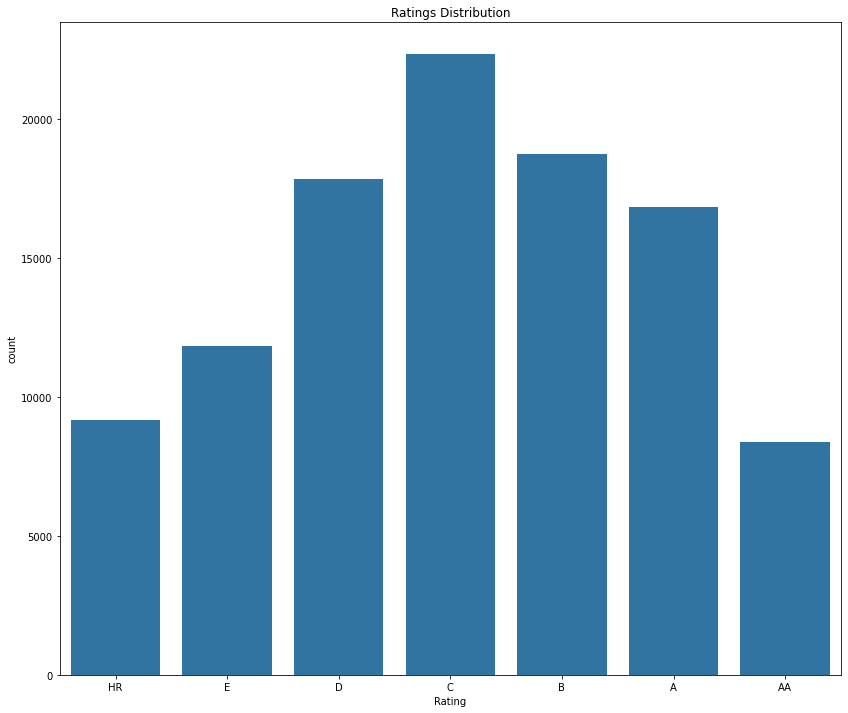

In [44]:
base_color = sb.color_palette()[0]
sb.countplot(data = loans_subset, x = 'Rating', color = base_color);
plt.title('Ratings Distribution');

#### Observations

It seems that most borrowers are between the ratings, D - A.

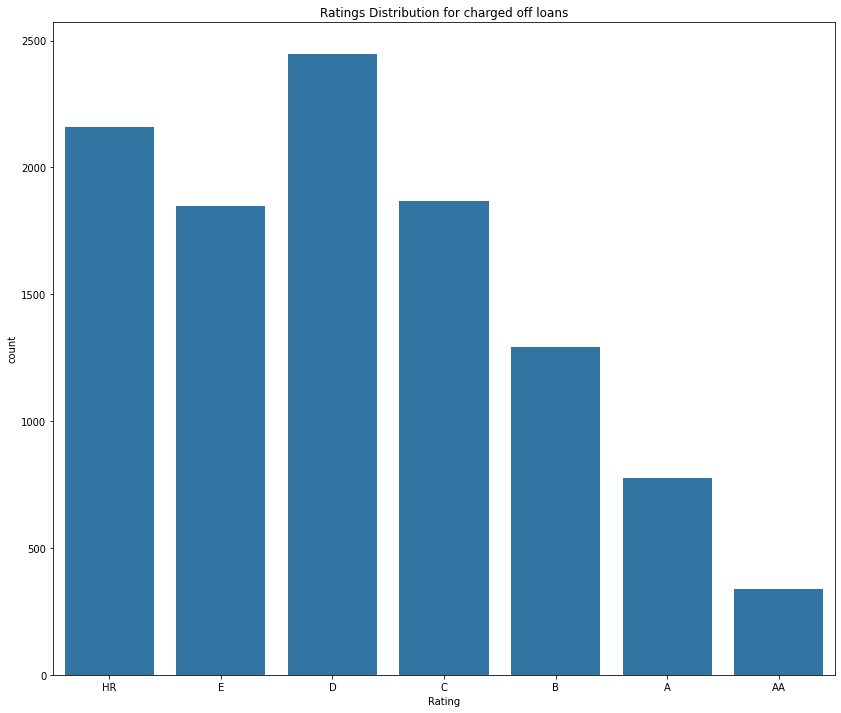

In [45]:
# Rating distribution for charged off loans
base_color = sb.color_palette()[0]
sb.countplot(data = loans_subset_c, x = 'Rating', color = base_color);
plt.title('Ratings Distribution for charged off loans');

#### Observations:
From the bar chart for charged off loans, we can infer that majority ratings are below B.

#### Questions
Which is the most common purpose of loan?

In [46]:
loans_subset['ListingCategory (numeric)'].value_counts()


1     54567
0     16535
7      9509
2      6949
3      5190
6      2356
4      2271
13     1788
15     1404
14      806
18      788
20      732
19      722
5       600
16      289
11      201
8       191
9        83
10       82
17       50
12       46
Name: ListingCategory (numeric), dtype: int64

#### Visualization

Following are the different purpose for which loans are taken.Each category is assigned a respective number to it.
0 - Not Available, <br>
1 - Debt Consolidation, <br> 
2 - Home Improvement, <br>
3 - Business, <br>
4 - Personal Loan, <br> 
5 - Student Use, <br>
6 - Auto, <br>
7- Other, <br>
8 - Baby&Adoption, <br>
9 - Boat, <br>
10 - Cosmetic Procedure, <br>
11 - Engagement Ring, <br>
12 - Green Loans, <br>
13 - Household Expenses, <br>
14 - Large Purchases, <br>
15 - Medical/Dental, <br>
16 - Motorcycle, <br>
17 - RV, <br>
18 - Taxes, <br>
19 - Vacation, <br>
20 - Wedding Loans

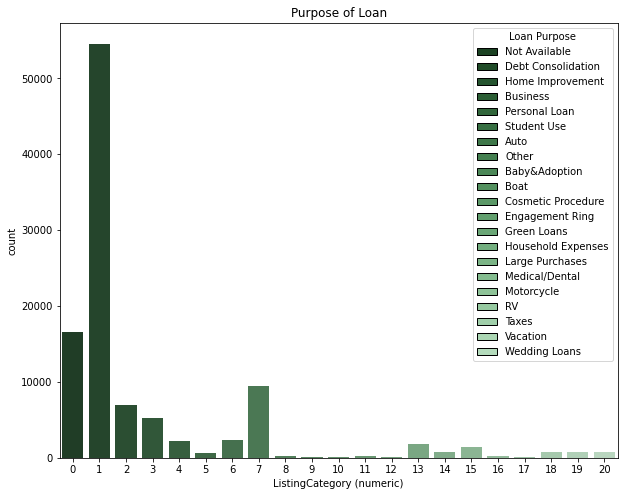

In [47]:
labels = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

plt.figure(figsize=(10, 8))
custom_palette = sb.cubehelix_palette(n_colors=len(labels), start=2, rot=0, dark=0.2, light=.8, reverse=True)
sb.countplot(data = loans_subset, x = 'ListingCategory (numeric)', palette = custom_palette)
plt.title('Purpose of Loan')

handles = [plt.Rectangle((0,0),1,1, color=custom_palette[i], ec="k") for i in range(len(labels))]

# Add the legend
plt.legend(handles, labels.values(), title='Loan Purpose', loc='upper right')

#### Observations

From the bar chart titled Purpose of Loan, it can be observed that majority of the Loans were taken for repayment of other multiples debts, and second highest number of loans are taken for automobile purchase.


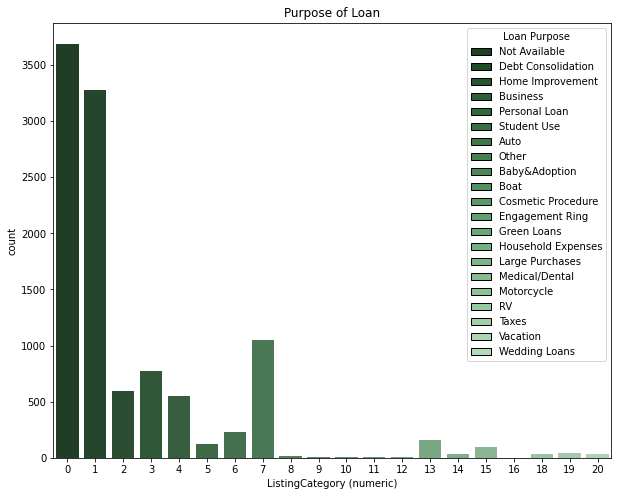

In [48]:
# Common purpose of loan for charged off loan category
labels = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

plt.figure(figsize=(10, 8))
custom_palette = sb.cubehelix_palette(n_colors=len(labels), start=2, rot=0, dark=0.2, light=.8, reverse=True)
sb.countplot(data = loans_subset_c, x = 'ListingCategory (numeric)', palette = custom_palette)
plt.title('Purpose of Loan')

handles = [plt.Rectangle((0,0),1,1, color=custom_palette[i], ec="k") for i in range(len(labels))]

# Add the legend
plt.legend(handles, labels.values(), title='Loan Purpose', loc='upper right')

As can be obseved from the bar chart, majority borrowers whose loans were charged off took the loan for Debt consolidation

### Occupation
#### Question
How data is distributed between borrowers' occupation?

In [49]:
occ = loans_subset['Occupation'].unique()
occ

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Flight Attendant', 'Nurse (LPN)',
       'Military Officer', 'Food Service Management',
       'Administrative Assistant', 'Police Officer/Correction Officer',
       'Social Worker', 'Truck Driver', 'Tradesman - Mechanic',
       'Medical Technician', 'Professor', 'Postal Service',
       'Civil Service', 'Realtor', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Landscaping', 'Tradesman - Carpenter',
       'Bus Driver', 'Tradesman - Plumber', 'Architect',
       'Engineer - Chemical', 'Doctor', 'Chemist',
       'Stud

We see that there are some nan values in the Occupation column.Let's replace these values with empty string

In [63]:
loans_subset.loc[:,['Occupation']] = loans_subset['Occupation'].fillna('')
loans_subset_c.loc[:,['Occupation']] = loans_subset_c['Occupation'].fillna('')

In [64]:
# Changing different student types values to student, similarly for trademan
loans_subset.loc[loans_subset.Occupation.str.contains('Student -'), 'Occupation'] = 'Student'
loans_subset.loc[loans_subset.Occupation.str.contains('Tradesman -'), 'Occupation'] = 'Tradesman'


loans_subset_c.loc[loans_subset_c.Occupation.str.contains('Student -'), 'Occupation'] = 'Student'
loans_subset_c.loc[loans_subset_c.Occupation.str.contains('Tradesman -'), 'Occupation'] = 'Tradesman'

In [65]:
loans_subset_c['Occupation'].value_counts()

Other                                2914
Professional                         1154
Administrative Assistant              432
Clerical                              429
Sales - Commission                    410
Sales - Retail                        347
Teacher                               346
Executive                             327
Computer Programmer                   292
Skilled Labor                         290
                                      284
Retail Management                     276
Accountant/CPA                        234
Analyst                               218
Laborer                               210
Construction                          192
Truck Driver                          175
Food Service                          162
Nurse (RN)                            151
Tradesman                             142
Civil Service                         141
Police Officer/Correction Officer     140
Military Enlisted                     139
Medical Technician                

In [70]:
# Let's filter this for excluding other and blank occupation
filtered_loans_subset = loans_subset[~loans_subset['Occupation'].isin(['Other', ''])]

# count the number of occurrences of each category
category_counts = filtered_loans_subset['Occupation'].value_counts()

# For charged off loans
# Let's filter this for excluding other and blank occupation
filtered_loans_subset_c = loans_subset_c[~loans_subset_c['Occupation'].isin(['Other', ''])]

# count the number of occurrences of each category
category_counts_c = filtered_loans_subset_c['Occupation'].value_counts()

#### Visualization

since there are total 63 occupations in the data, it wont be possible to show them in a single plot. Hence, we will print only the top 15 occupations that applied for loans.

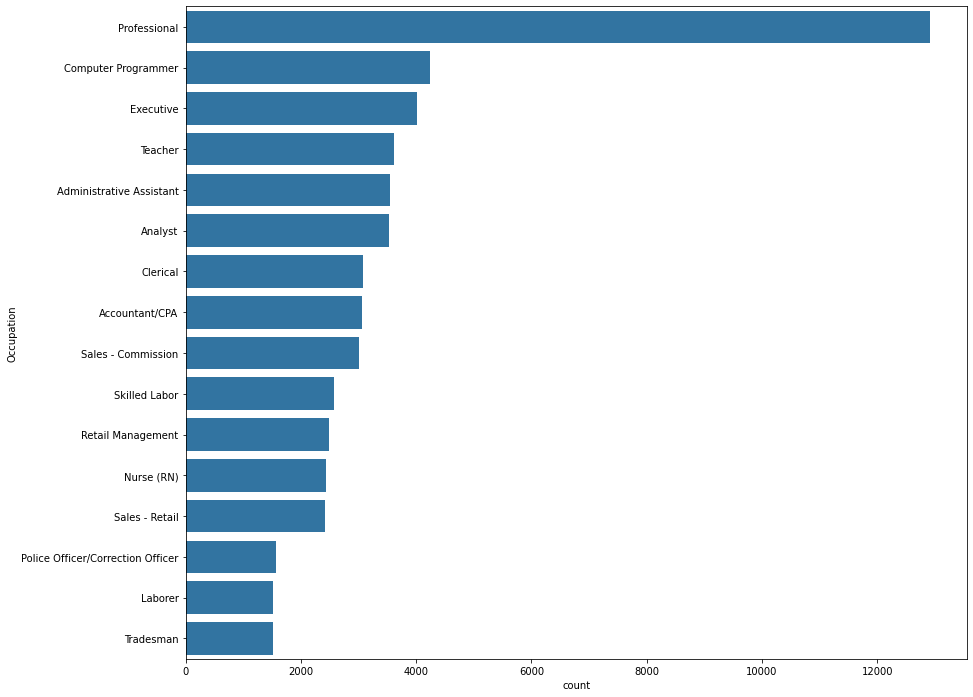

In [71]:
n_loans = loans_subset.shape[0]
occupation_count = category_counts[:16]
occupation_order = occupation_count.index
base_color = sb.color_palette()[0]
sb.countplot(data=loans_subset, y='Occupation', color=base_color, order=occupation_order);

#### Observations

The maximum number of loan applicants are professionals.After professionals, the majority of the loan applicants are Computer Programmers, Executives, Teacher, Administrative Assistants, Analysts,Sales-Commission 

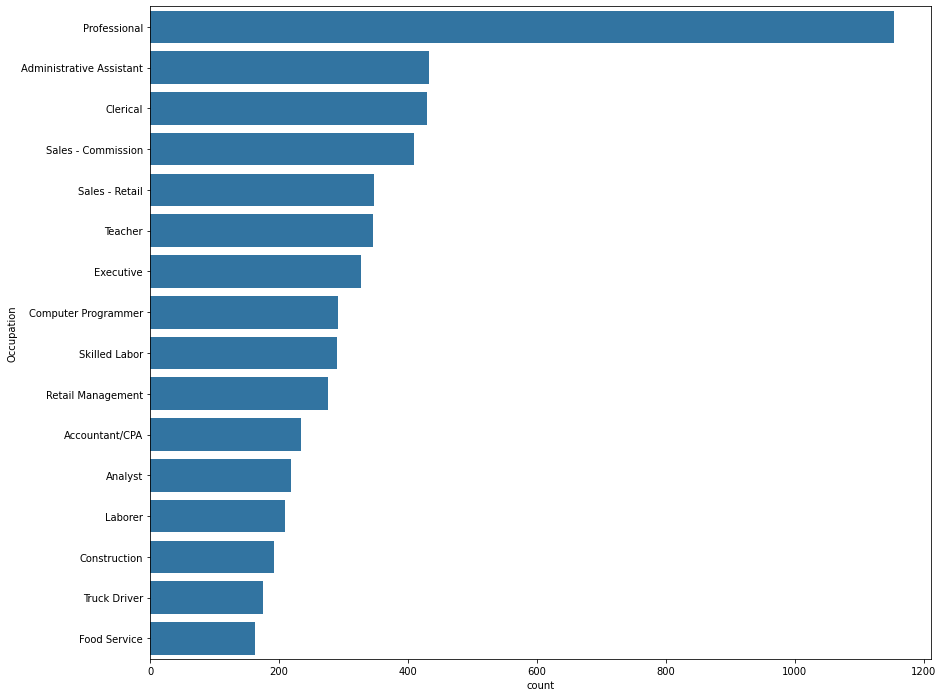

In [73]:
n_loans_c = loans_subset_c.shape[0]
occupation_count_c = category_counts_c[:16]
occupation_order_c = occupation_count_c.index
base_color = sb.color_palette()[0]
sb.countplot(data=loans_subset_c, y='Occupation', color=base_color, order=occupation_order_c);

### Term

#### Question
What is the distribution of term of loan ?

In [55]:
loans_subset.Term.value_counts()

36    80602
60    23143
12     1414
Name: Term, dtype: int64

#### Visualization:

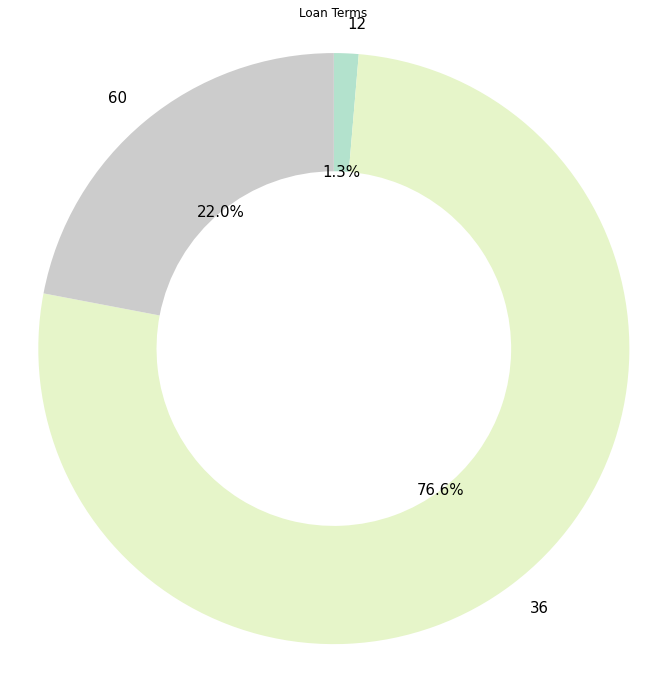

In [56]:


# Group the data by term and count the number of loans in each group
term_counts = loans_subset.groupby('Term').size()
#select pastel color palette 
pastel_colors = plt.cm.get_cmap('Pastel2')(np.linspace(0, 1, len(term_counts)))

# Create a pie chart with the term counts
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle = 90, 
        counterclock = False, wedgeprops = {'width': 0.4}, textprops = {'fontsize':15}, colors = pastel_colors )
plt.axis('square')
plt.title('Loan Terms')
plt.show()

#### Observation

From the pie chart for Loan Term, we can observe that the maximum loans are applied for a period of 36 months i.e. 3 years which suggests that there is more demand for short term loans

### TradesNeverDelinquent (percentage)

#### Question :
How is the percentage of trades that have never been delinquent distributed ?

#### Visualization

In [57]:
loans_subset['TradesNeverDelinquent (percentage)'].value_counts()

1.00    37686
0.96     3950
0.95     3465
0.90     2917
0.94     2805
        ...  
0.32        5
0.19        4
0.06        3
0.03        1
0.99        1
Name: TradesNeverDelinquent (percentage), Length: 97, dtype: int64

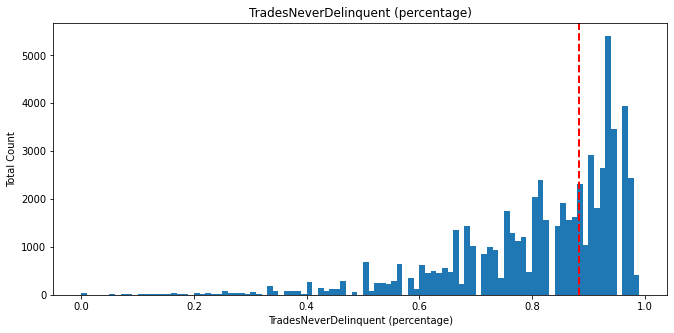

In [58]:
plot_histogram_with_stats(loans_subset, 'TradesNeverDelinquent (percentage)', 1, 0.01)

#### Observations:

We see that the distribution is left skewed. It can be inferred that for majority of the loan applicants, the percentage of trades that never got delinquent are 0.90 and above suggesting that majority loan applicants repaid their loans on time.

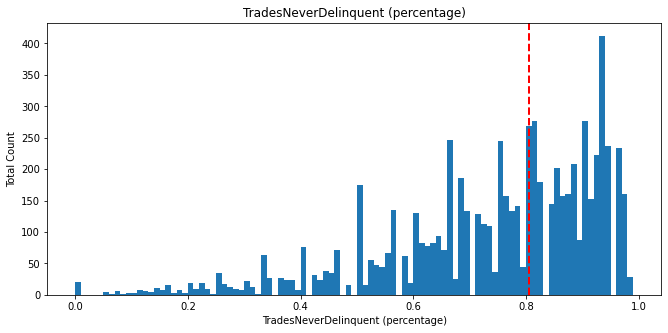

In [59]:
plot_histogram_with_stats(loans_subset_c, 'TradesNeverDelinquent (percentage)', 1, 0.01)

#### Observations:


The bar chart for Trades Never delinquent ratio for charged off loans shows that majority people have a higher ratio with mean ratio being 0.8 which is a good ratio suggesting that majority borrowers under this category have a good repayment track record.

#### Question
How is the APR changing over time?

#### Visualization

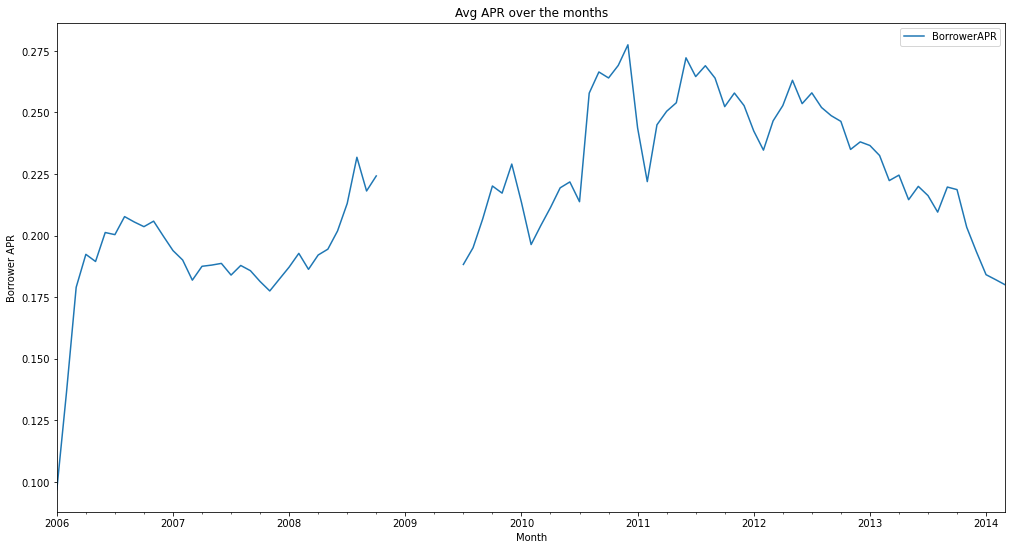

In [60]:
def draw_trend(df, var, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(17, 9))
    
    # Convert the LoanOriginationDate column to datetime format
    df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'], format='%Y-%m-%d')
    
    # Group the data by month and calculate the mean of the specified variable
    monthly_data = df.groupby(pd.Grouper(key='LoanOriginationDate', freq='m'))[var].mean()
    
    # Plot the data
    monthly_data.plot()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

draw_trend(loans_subset, 'BorrowerAPR', 'Avg APR over the months', 'Month', 'Borrower APR')

In [61]:
loans_subset['month'] = loans_subset['LoanOriginationDate'].dt.month

In [62]:
loans_subset['year'] = loans_subset['LoanOriginationDate'].dt.year

#### Observation

When observing the APR over the months, we see that there are no loan applications for the months ranging between Nov, 2008 and  April, 2009. Overall, the trend is going upwards from 2006 till 2011.Post which it starts to go down.

### Discuss the distribution(s) of our variable(s) of interest. Were there any unusual points? Did we need to perform any transformations?

> The variables of interest are APR which is a multi modal distribution.
We observe that majority of the data in APR column is centered around the mean Value i.e. 0.22. But this is an independent observation for the variable. We would like to observe the relationship of APR with other variables to see how it is related to the other variables.

>Yes all records with Null values have been removed for variables that were examined namely - APR, Borrower Rating

> Also, to check the trend of APR over the years, we converted the LoanOriginateDate to datetime format and extracted the month value in a separate column to plot the time series graph. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, there are many unusual distributions and operations were performed to tidy the data or change it's form.The details of which are as under:

> 1. Stated Monthly Income: Though the maximum monthly income is 175000, we have shown the monthly income data of applications that are making income between 0 and 75000, since there is only one individual who is making more than 75000.This was observed by plotting a box plot and is treated as an outlier and hence not considered while plotting the distribution.
> 2. Debt to Income ratio: The ratio has values ranging between 0 and 10. On examining the dsitribution, it is seen that majority values are less than one.Hence, we plotted distribution for values less than 1.
> 3. Loan Status : the values in this column are changed for past due.All past due values as divided by number of days in the dataset, is now converted into a single value - past due.This is done for a cleaner visualization
> 4. Rating : since column Credit Grade and Proposper Rating(Alpha) are stating the application before and after 2009 respectively. We have combined the two columns into one column "Rating".This is done to maximize the non-null values in the columns.
> 5. Occupation : Since the number of occupations are 67 which is high. Hence, we clubbed some categories into one like Students and Tradesman.Also, we filtered others and nan values from this category by creating a filtered dataframe. It is difficult to plot all categories in one chart.Hence, we have shown only top 15 occupations by the number of applicants.This is done for two reasons - first , that plotting all occupations count won't serve the purpose of presentation. Second, We are interested in knowling only those occupations which are borrowing the most.
> It is also observed that no loan applications are there between Nov, 2008 to April 2009. we need to inverstigate to find out the reason for the same.

Next, we find out any relationships between the variables examined do far.

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in our
data. 

### Quantitative vs Quantitative Variable

Lets first check if there is any correlation between quantitative variables 

In [ ]:
loans_subset.columns

In [ ]:
numeric_var = ['BorrowerAPR', 'DebtToIncomeRatio', 'LoanOriginationDate', 'LoanOriginalAmount', 'OpenRevolvingMonthlyPayment', 'TradesNeverDelinquent (percentage)', 'StatedMonthlyIncome']
categorical_var = ['LoanStatus', 'ListingCategory (numeric)', 'Occupation', 'Term', 'Rating' , 'EmploymentStatus', 'IncomeVerifiable',  ]

In [ ]:

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loans_subset[numeric_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

The heatmap doesn't show any strong correlations between the quantitative variables.Now, we will try use a matrix and using the sample data from loans_subset

In [ ]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("loans_subset.shape=",loans_subset.shape)
loans_samp = loans_subset.sample(n=500, replace = False)
print("loans_samp.shape=",loans_samp.shape)

g = sb.PairGrid(data = loans_samp, vars = numeric_var)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

No clear relationships can be seen in the scatterplot either.Let's draw individual scatterplots and treat them for noise with jitters and transparency to make judgements and draw insights

#### Debt to Income Ratio vs APR

#### Visualization

In [ ]:
import seaborn as sns
# since we are mostly interested in the APR, lets find relationship of APR with other numeric variables
sns.regplot(data = loans_subset, x = 'BorrowerAPR' , y = 'DebtToIncomeRatio');
plt.xlabel('Borrower APR')
plt.ylabel('Debt to Income Ratio')
# plt.ylim((0,6));

#### Observations

The scatterplot is clearly overplotted, we need to add transparency to see the line of best fit and the r'ship betweeen APR and Debt to Inc ratio

In [ ]:
sns.regplot(data = loans_subset, x = 'BorrowerAPR' , y = 'DebtToIncomeRatio', scatter_kws={'alpha':1/50});
plt.xlabel('Borrower APR')
plt.ylabel('Debt to Income Ratio')
plt.ylim((0,2)); #since majority data points are within debt to income ratio of 2, we will limit the y axis values to 2.

#### Observations

We can observe from the new scatterplot that line of best fit is sloping upwards, suggesting that rate of interest increases as the debt to income ratio increases.However, we have seen in the previous scatterplot that borrowers with high debt to income ratio are also given loans at a lower interest rate.Hence, we can not certainly say that higher debt levels would lead to higher interest rates for borrowers. We need to investigate further to conclude this with certainity

#### Loan amount vs APR

#### Visualization

In [ ]:
sns.regplot(data = loans_subset, x = 'BorrowerAPR' , y = 'LoanOriginalAmount', scatter_kws={'alpha':1/50});
plt.xlabel('Borrower APR')
plt.ylabel('Loan amount')
plt.title('Loans amount vs APR')

#### Observation

We observe that there is a negative correlation between Loan amount and APR. The interest rates fall as the Amount of loan increases.

#### Trades never delinquent vs APR

#### Visualization

In [ ]:
sns.regplot(data = loans_subset, x = 'BorrowerAPR' , y = 'TradesNeverDelinquent (percentage)', scatter_kws={'alpha':1/100});
plt.xlabel('Borrower APR')
plt.ylabel('Trades Never Delinquent (percentage)')

#### Observations

There is a negative correlation between APR and Trades never delinquent which was expected as the higher the trades never deliquent percentage, the better are consumers' credit score and hence less would be the interest rates charged from them.However, this statement is true for majority borrowers.It doesn't hold true for all borrowers as a large number of borrowers whose tradesneverdelinquent(TND) ratio is high and yet they are charged higher interest rates.Similarly, there are a few borrowers whose TND ratio is low and yet they are charged lower interest rates

#### Stated monthly income vs APR

#### Visualization

In [ ]:
sns.regplot(data = loans_subset, x = 'BorrowerAPR' , y = 'StatedMonthlyIncome', scatter_kws={'alpha':1/50});
plt.xlabel('Borrower APR')
plt.ylabel('Monthly income')
plt.ylim((0,35000));

#### Observation

It can be observed that there is a negative correlation between borrower's income and interest rate. Lower the income, higher the interest rate. This is because if income is low, the risk of repayment is higher.To account for the risk bank's increase the interest rates.

### Quantitative vs Qualitative Variables

Let's now examine the relationship between numeric and categorical variables. 
#### APR vs Loan Status 

#### visualization

In [ ]:
loans_subset.LoanStatus.unique()

In [ ]:
# Lets explore the relationship between 'LoanStatus' and 'BorrowerAPR'
loan_status = ['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress']
lstatus = pd.api.types.CategoricalDtype(ordered=True, categories=loan_status)
loans_subset['LoanStatus'] = loans_subset['LoanStatus'].astype(lstatus);

plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=loans_subset, x='LoanStatus', y='BorrowerAPR', color=base_color);
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=loans_subset, x='LoanStatus', y='BorrowerAPR', color=base_color);
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

#### Observation

We can clearly see that the interest rates are different for different cetrgories of loan status.Interest rates are lower for completed and current as can be observed from the wider violins at 0.1 and 0.2 respectively. For past due, defaulted and charged off the rates are around 0.3 and above.

#### APR vs Occupation

In [ ]:
loans_subset.Occupation.unique()

#### Visualizations

In [ ]:
# Lets explore the relationship between 'Occupation' and 'BorrowerAPR'
fig = plt.figure(figsize=(15, 40))
sb.boxplot(data=filtered_loans_subset, y='Occupation', x='BorrowerAPR', color=base_color);


#### Observation

The box plot between APR and Occupation suggests that majority borrowers are being charged interest rates between 0.1 and 0.3 range except for teachers.

#### APR vs Term

In [ ]:
loans_subset.Term.value_counts()

#### Visualization

In [ ]:
# Lets explore the relationship between 'LoanStatus' and 'BorrowerAPR'
term_status = [60, 36, 12]
tstatus = pd.api.types.CategoricalDtype(ordered=True, categories=term_status)
loans_subset['Term'] = loans_subset['Term'].astype(tstatus);

plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=loans_subset, x='Term', y='BorrowerAPR', color=base_color);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=loans_subset, x='Term', y='BorrowerAPR', color=base_color);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

#### Observations

The violin plot and box plot for the relationship between Term and APR suggests that the borrower APR are lowest for long term loans(5 years)

#### APR vs Rating

In [ ]:
loans_subset.Rating.unique()

#### Visualization

In [ ]:
# Lets explore the relationship between 'LoanStatus' and 'BorrowerAPR'
ratings = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ratings_cat = pd.api.types.CategoricalDtype(ordered=True, categories=ratings)
loans_subset['Rating'] = loans_subset['Rating'].astype(ratings_cat);

plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=loans_subset, x='Rating', y='BorrowerAPR', color=base_color);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=loans_subset, x='Rating', y='BorrowerAPR', color=base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

#### Observation

As it can be seen in the violin plot as well as box plot that APR is higher for lower ratings and as the ratings improve the interest rates also come down. Hence, the two variables are negatively correlated

### Relationship between other variables

#### Occupation vs Stated Monthly Income

#### Visualization

In [ ]:
fig = plt.figure(figsize=(15, 40))
sb.boxplot(data=filtered_loans_subset, y='Occupation', x='StatedMonthlyIncome', color=base_color);
plt.xlim((0,50000))

#### Observations

We can observe from the box plot of Income and Occupation, the highest incomes are made by borrowers in the following occupation:
    
    1. Judge
    2. Doctor
    3. Dentist
    4. Pharmacist
    5. Attorney
    6. Executives

#### Rating vs 'TradesNeverDelinquent (percentage)'

#### Visualization

In [ ]:
ratings = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ratings_cat = pd.api.types.CategoricalDtype(ordered=True, categories=ratings)
loans_subset['Rating'] = loans_subset['Rating'].astype(ratings_cat);

plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=loans_subset, x='Rating', y='TradesNeverDelinquent (percentage)', color=base_color);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=loans_subset, x='Rating', y='TradesNeverDelinquent (percentage)', color=base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

#### Observation

Higher ratings are assigned to those borrowers whose Trades-never-delinquent ratio is highest. As we can see in the violin plot, the data is most spread out near 1 for AA rating.The spread reduces at this point as we go towards left or lower ratings.

#### Rating vs 'StatedMonthlyIncome'

#### Visualization

In [ ]:
ratings = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ratings_cat = pd.api.types.CategoricalDtype(ordered=True, categories=ratings)
loans_subset['Rating'] = loans_subset['Rating'].astype(ratings_cat);

plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=loans_subset, x='Rating', y='StatedMonthlyIncome', color=base_color);
# plt.ylim((0, 50000))

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=loans_subset, x='Rating', y='StatedMonthlyIncome', color=base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

In [ ]:
loans_subset.StatedMonthlyIncome.max()

#### Visualization

In [ ]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize = [16, 15])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=loans_subset, x='Rating', y='StatedMonthlyIncome', color=base_color);
# plt.ylim((0, 100000))
plt.yscale('log')
yticks = [100, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 40000, 160000, 640000]
plt.yticks(yticks)
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)


# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=loans_subset, x='Rating', y='StatedMonthlyIncome', color=base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.yscale('log')
plt.yticks(yticks)
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

#### Observations

Majority Borrowers with higher credit rating have taken loans above USD 4000. While those rated C and D, have taken loans ranging between 100 and 5000. and those whose rating are below D, have taken loans raning from 100 and 2000  

### Qualitative vs Qualitative

In [ ]:
loans_subset.columns

#### Comparing Loan status with :
> Income Verifiable<br>
> Employment Status<br>
> Term<br>
> Rating

#### visualization

In [ ]:
from matplotlib import rcParams
# Comparing 'LoanStatus' variable to the other categorical variables
rcParams['figure.figsize'] = 14, 12

#subplot 1
plt.subplot(2,2,1)
sb.countplot(data = loans_subset, x = 'IncomeVerifiable', hue = 'LoanStatus')
plt.legend(bbox_to_anchor=(1.27, 1),
           borderaxespad=0) # push the legend to the side
plt.title('Income Verifiable vs. Loan Status');


#subplot 2
plt.subplot(2,2,2)
sb.countplot(data = loans_subset, x = 'EmploymentStatus', hue = 'LoanStatus')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title('Employment Status vs. Loan Status');

#subplot 3
plt.subplot(2,2,3)
sb.countplot(data = loans_subset, x = 'Term', hue = 'LoanStatus')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(0.92, 1),
           borderaxespad=0)
plt.xlabel('Term in month')
plt.title('Term vs. Loan Status');

#subplot 4
plt.subplot(2,2,4)
sb.countplot(data = loans_subset, x = 'Rating', hue = 'LoanStatus')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title('Rating vs. Loan Status');

plt.subplots_adjust(wspace=0.50, 
                    hspace=0.5)

#### Observations

Starting with the first plot on the left and moving clockwise, we observe :
1. That a vast majority of the loans were given to those whose income has been verified. In fact, we can see that it doesn't matter what the loan status is, the number of loans for each category of statuses in verified income will be many time larger than in unverified. 

2. Moving on to the next plot, there isn't much information to derive from 'part-time', 'not employed' and 'retired', but we can conclude that almost all of the current loans are given to those who are considered employed. Those considered 'full-time' holds the most completed loans.

3. Next, we can see the current loans make up a portion of each rating, as well as being the highest count. The next hgihest count across all rating is completed. We can also see that the majority of current loans are held by those with ratings, C - A, while completed loans are among those borrowers who are rated D - A

4. Lastly, at the bottom left, we can see that a vast majority of the loans are 36-terms. It seems like 36-month holds the most loans of each types. However, we can also see that there is quite a bit of current loans for 60-month term. 

Comparing Income Verifiable with:
>Employment Status<br>
>Term<br>
>Rating

#### Visualization

In [ ]:
plt.figure(figsize = [10, 15])

#subplot 1
plt.subplot(3,1,1)
sb.countplot(data = loans_subset, y = 'EmploymentStatus', hue = 'IncomeVerifiable')
plt.legend(bbox_to_anchor=(1.27, 1),
           borderaxespad=0, title = "Income Verified")
plt.xticks(rotation = 30)
plt.title('Employment Status vs. Income Verifiable');

#subplot 2
plt.subplot(3,1,2)
sb.countplot(data = loans_subset, y = 'Term', hue = 'IncomeVerifiable')
plt.legend(bbox_to_anchor=(1.27, 1),
           borderaxespad=0, title = "Income Verified")
plt.xticks(rotation = 30)
plt.title('Term vs. Income Verifiable');

#subplot 3
plt.subplot(3,1,3)
sb.countplot(data = loans_subset, y = 'Rating', hue = 'IncomeVerifiable')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0, title = "Income Verified")
plt.xticks(rotation = 30)
plt.title('Rating vs. Income Verifiable');

plt.subplots_adjust(hspace=1)

#### Observations
Following observations ccan be made from the charts:
   > 1. Majority loans were granted to borrowers who are employed or full-time and their income is verified.<br>
   > 2. Majority loans were granted for a period of 36 months to those whose incomes were verified. <br>
   > 3. Again , majority loans were granted to borrowers whose rating ranges from D - A and incomes verified
#### Comparing Borrower Ratings with Term

#### Visualization

In [ ]:
plt.figure(figsize = [6, 8])


sb.countplot(data = loans_subset, x = 'Rating', hue = 'Term')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0, title = 'Terms(in months)')
plt.xticks(rotation = 30)
plt.title('Rating vs. Term');plt.figure(figsize = [6, 8])


#### Observation

The clustered bar chart suggests that majority loans were granted for a period of 36 months as we discovered in previous analysis too.The same is high for all rating including the lowest rating of HR.But it is highest for borrowers with a rating of C and then D.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Following observations were made while analysing the dataset for relationships between APR and other variables

1. Loans Staus vs APR : Interest rates are lower for completed and current as can be observed from the wider violins at 0.1 and 0.2 respectively. For past due, defaulted and charged off the rates are around 0.3 and above.

2. Occupation vs APR : The violin plot between APR and Occupation suggests that majority loans are between 0.1 and 0.2 range except for teachers, homemakeer, bus drivers and flight attendants who are being charged a comparitively higher interest rate.

3. Term vs APR : The borrower APR are lowest for long term loans(5 years)

4. Rating vs APR : The two variables are inversely related suggesting that borrowers with better ratings are charged less rates of interest.

Finally, we can conclude that Interest rates are impacted by Status of loan , Occupation, Term and Rating as these factors describe the risk associated with the repayment of loan and hence accounted for in the interest rate.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, there are some interesting relationships between other combinations of quantitative and qualitative variables.

1. Occupation vs Stated Monthly income : The highest incomes are made by borrowers in the following occupation:

>1. Judge
>2. Doctor
>3. Dentist
>4. Pharmacist
>5. Attorney
>6. Executives

2. Rating vs 'TradesNeverDelinquent (percentage) : Higher ratings are assigned to those borrowers whose Trades-never-delinquent ratio is highest, indicating a direct/positive relationship between Rating and Trades never delinquent

3. Rating vs 'StatedMonthlyIncome : Higher the rating, higher is the range of loans taken by borrowers i.e. majority borrowers with good credit rating have not taken loans less than USD 2000.

4. Income Verifiable vs Loan status : That a vast majority of the loans were given to those whose income has been verified. In fact, it doesn't matter what the loan status is, the number of loans for each category of statuses in verified income will be many times larger than in unverified.

5. Employment Status vs Loan Status : There isn't much information to derive from 'part-time', 'not employed' and 'retired', but we can conclude that almost all of the current loans are given to those who are considered employed. Those considered 'full-time' holds the most completed loans.

6. Rating Vs Loan Status : The current loans make up majority portion of each rating, as well as being the highest count. The next highest count across all rating is completed. Also, the majority of current loans are held by those with ratings, C - A, while completed loans are among those borrowers who are rated D - A

7. Term vs Loan Status :  A vast majority of the loans are 36-terms. It seems like 36-month holds the most loans of each types of loan status. However, we can also see that there is quite a bit of current loans for 60-month term.

## Multivariate Exploration

> In this section, we will create plots of three or more variables to investigate our data even
further.

#### Loan amount vs Interest vs Rating
#### Visualization:

In [ ]:
# Assuming your DataFrame is named loans_subset
plt.figure(figsize=(15, 15))

sns.scatterplot(data=loans_subset, x='LoanOriginalAmount', y='BorrowerAPR', hue='Rating', palette='viridis');
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.title('Loan Amount vs Interest Rate vs Rating')
plt.show()

#### Observation:
As can be observed higher the rating, lower is the interest rate except a few till the amount of 25,000 that are rated higher and yet given at a higher interest rates

#### Loan amount vs Interest Rate vs Monthly payment

#### Visualization:

In [ ]:
loans_subset.columns

In [ ]:
plt.figure(figsize=(15, 15))

# Create a scatter plot with color encoding for monthly payments
plt.scatter(loans_subset['LoanOriginalAmount'], loans_subset['BorrowerAPR'], c=loans_subset['OpenRevolvingMonthlyPayment'], cmap='Purples', alpha=0.5)

# Add a color bar to the plot
plt.colorbar()

# Add axis labels and a title
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.title('Loan Amount vs. Interest Rate with Monthly Payment Color Encoding')
# Show the plot
plt.show()

#### Observations:

The scatter plot suggests that repayments are mostly below USD 4000 with a few exceptions where it is higher than USD 4000

#### Rating vs APR vs Term

#### Visualization:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=loans_subset, x='Rating', y='BorrowerAPR', hue='Term')
plt.xlabel('Rating')
plt.ylabel('Borrower APR')
plt.title('Box Plot of Borrower APR by Rating and Term')
plt.show()

#### Observations:

Apart from the observation that there is an inverse relationship between Rating and Borrower APR, which we observed in many previous charts, we observe 

1. That avg APR for HR and E rated borrowers is almost equal and overall higher than those who are rated higher
2. Borrowers rated HR(lowest) are not granted any 12 month or 60 month loan, but they are granted 36 month loan.
3. Majority borrowers that are granted for 12 month period are rated E and D.
4. Borrowers who are rated the lowest have been charged the highest interest rates too(0.5 and above)

In [ ]:
# loans_copy = loans_subset.copy()
loans_subset['Debt_level'] = loans_subset['DebtToIncomeRatio'].apply(lambda x: 'High' if x > 1 else 'Low')

#### Visualization:

In [ ]:

rating_order = ['High', 'Low']

# plt.scatter(data = loans_copy, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', s = 'DebtToIncomeRatio')
DITR_cat = pd.api.types.CategoricalDtype(categories = rating_order, ordered = True)
loans_subset['Debt_level'] = loans_subset['Debt_level'].astype(DITR_cat)

# dummy series for adding legend
sizes = np.where(loans_subset['Debt_level'] == 'High', 300, 30)
base_color = sb.color_palette()[0]
# legend_obj = []
# for s in sizes:
#     legend_obj.append(plt.scatter([], [], s = s, color = base_color))
# plt.legend(legend_obj, sizes)
plt.scatter(loans_subset['LoanOriginalAmount'], loans_subset['StatedMonthlyIncome'], color=base_color, s=sizes, alpha=0.08)
plt.xlabel('Loan Original Amount')
plt.ylabel('Stated Monthly Income')
plt.title('Scatter Plot with Size Encoding')
# plt.colorbar(label='Debt to Income Ratio')
plt.ylim(0,80000)
plt.show()

In [ ]:
loans_subset.Debt_level.value_counts()

#### Observations:

As can be observed from the chart, that there are very few point that are showing high debt levels and majority of those points are near borrowers with income level less than 10000


#### Loan amount vs debt to income ratio for loan statuses and debt level
#### Visualization:

In [ ]:
g = sb.FacetGrid(data = loans_subset, col = 'LoanStatus', row = 'Debt_level', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'DebtToIncomeRatio');
plt.show()

#### Observation:

From the facet grid we can infer that borrowers with a low debt level, the loan amount of certain borrowers is higher than 25,000. However, for borrowers with higher debt level, the loan amount does not go beyond 25,000.
An interesting observation here is that even with a higher debt levels, many borrowers completed their loans.

In [ ]:
g = sb.FacetGrid(data = loans_subset, col = 'LoanStatus', row = 'Debt_level', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'DebtToIncomeRatio', 'BorrowerAPR');
plt.show()

###  Some of the relationships we observed in this part of the investigation. Were there any features that strengthened each other in terms of looking at our feature(s) of interest?

Following observations can be made with regards to interest rates:

1. Loan amount vs Interest vs Rating
Higher the rating, lower is the interest rate except a few till the amount of 25,000 that are rated higher and yet given at a higher interest rates

2. Loan amount vs Interest Rate vs Monthly payment 
Irrespective of the loan amount, repayments are mostly below USD 4000 with a few exceptions where it is higher than USD 4000

3. Rating vs APR vs Term
That avg APR for HR and E rated borrowers is almost equal.(lower ratings)
Borrowers rated HR(lowest) are not granted any 12 month or 60 month loan, but they are granted 36 month loan.
borrowers that are granted for 12 month period are mainly rated E and D.
Borrowers who are rated the lowest have been charged the highest interest rates too(0.5 and above)

### Were there any interesting or surprising interactions between features?

1. Even with a higher debt levels, many borrowers completed their loans.Hence, we can not surely say if debt levels are higher, the loan would be defaulted or not repaid on time.

2. A charge-off rate of 10% and above is relatively high and indicates a higher level of credit risk in the loan portfolio. It suggests that a significant portion of borrowers in the portfolio are experiencing financial difficulties or have defaulted on their loan obligations.

## Conclusions


Overall, the findings suggest that interest rates are influenced by loan status, occupation, term, and rating, as these factors reflect the risk associated with loan repayment. Other interesting relationships were observed between occupation and income, rating and trades never delinquent, rating and loan amount, and employment status and loan status. These insights can help understand the factors affecting interest rates and loan outcomes in the dataset.

The prosper loans dataset is mainly explored using univariate, bivariate and multivariate visualizations.The visaulizations are mostly self explanatory. However, Observations are also documented for each plot.
